In [189]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Лабораторная работа №6. Singular Value Decomposition

Исходное изображение

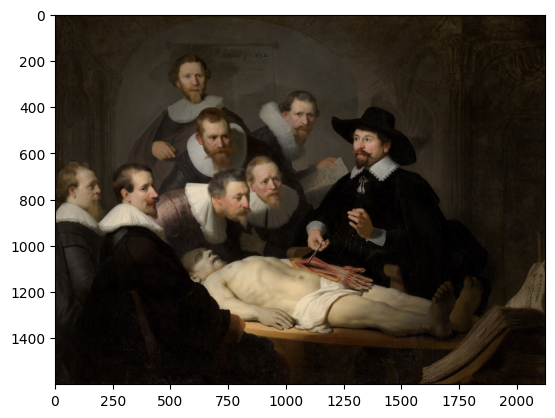

In [190]:
img = cv.imread('assets/image.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Grayscale изображение

In [191]:
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

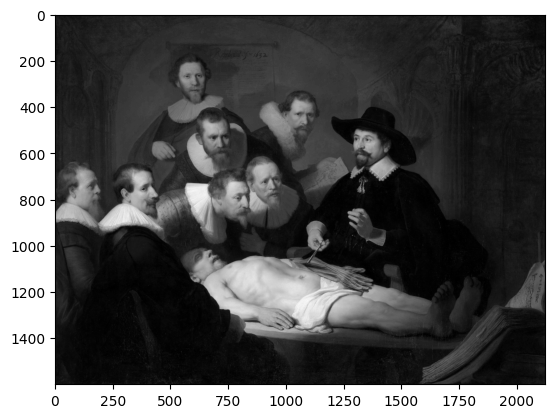

In [192]:
plt.imshow(img, cmap='gray')

SVD разложение

In [193]:
u, s, vT = np.linalg.svd(img)

In [194]:
S = np.zeros((img.shape[0], img.shape[1]))
S[:img.shape[0], :img.shape[0]] = np.diag(s)

Сжатие изображения

In [207]:
m, n = img.shape
originalSize = m * n

k = 900, compression rate = 98.67%


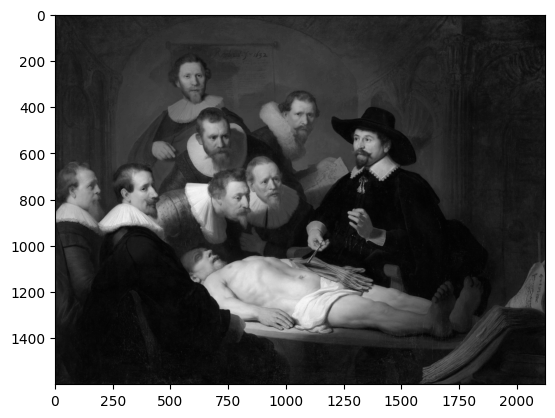

k = 500, compression rate = 54.82%


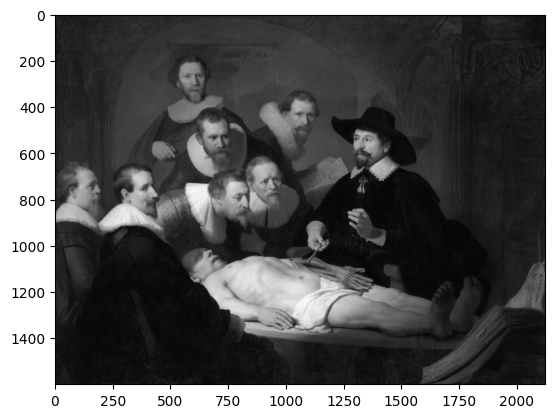

k = 200, compression rate = 21.93%


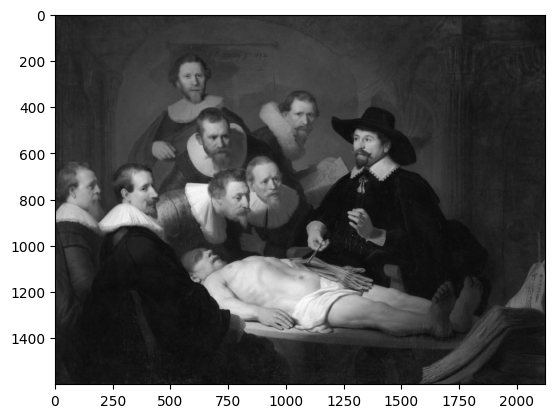

k = 100, compression rate = 10.96%


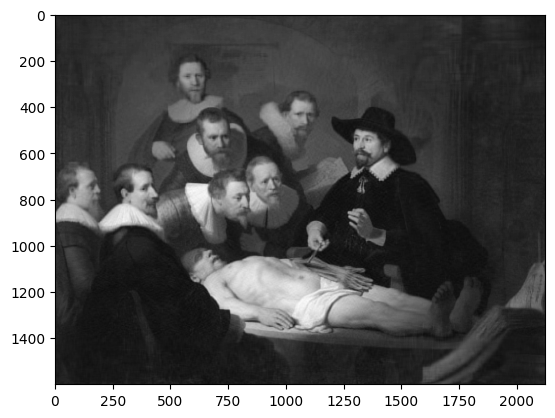

k = 50, compression rate = 5.48%


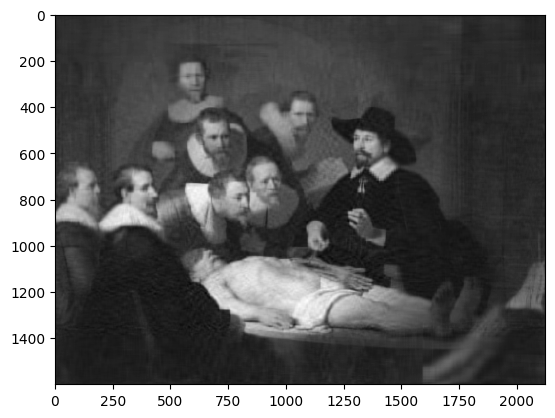

k = 10, compression rate = 1.1%


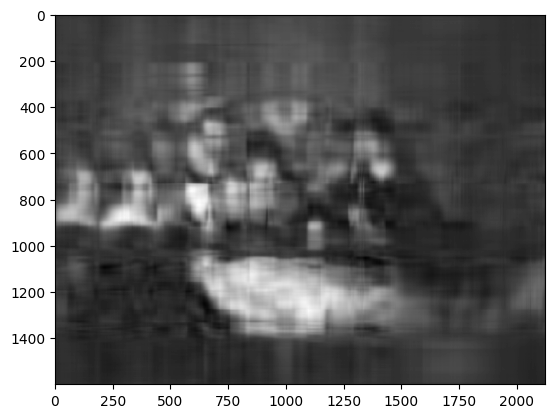

k = 1, compression rate = 0.11%


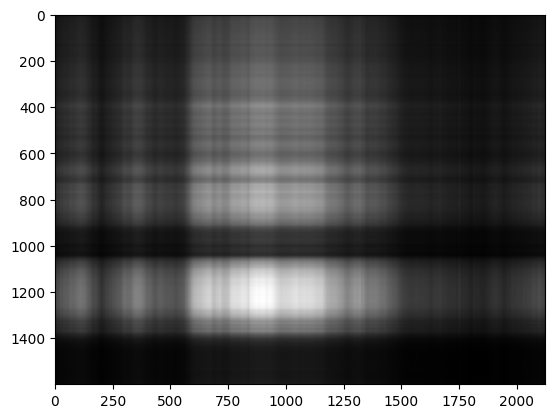

In [209]:
for k in [900, 500, 200, 100, 50, 10, 1]:
    img_r = u[:, :k] @ S[:k, :k] @ vT[:k, :]
    compressedSize = k * (1 + m + n)
    ratio = compressedSize / originalSize
    print(f'k = {k}, compression rate = {round(ratio * 100, 2)}%')
    plt.imshow(img_r, cmap='gray')
    plt.show()

Влияя на параметр k, мы можем "выкинуть" меньшие по значению сингулярные числа, значительно уменьшив количество хранимой информации, при этом сохранив исходное качество данных. Как видно из примера выше, при сжатии до 10% изображении всё еще схоже по четкости с исходным. Начиная с сжатия до 6% и ниже, картинка становится трудноразличимой